# Лабораторная работа №3 «Метод прогонки для линейных дифференциальных уравнений второго порядка с периодическим решением»

## Дашкевич Артём Владимирович

### Скрин постановки задачи:
![image.png](attachment:image.png)

### Описание метода:   
Запишем дискретный аналог уравнения:   
![image.png](attachment:image.png)   
В таком случае система сеточных соотношений принимает вид:   
![image-2.png](attachment:image-2.png)   
Для нашего уравнения p_n = 0

Заполним массивы коэффициентов a, b и c:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
h = 0.005

def q_n(n, h):
    return -10 - np.sin(2 * np.pi * n * h)

def f_n(n, h):
    return np.cos(2 * np.pi * n * h)

def fi_n(n, h):
    return f_n(n, h) * h ** 2

size = int(1 / h) + 1
a = [0] * size
b = [0] * size
c = [0] * size

In [ ]:
def fill_a(a):
    for i in range(len(a)):
        a[i] = 1

def fill_b(b, q_n, h):
    for i in range(len(b)):
        b[i] = 2 - q_n(i, h) * (h ** 2)

def fill_c(c):
    for i in range(len(c)):
        c[i] = 1

In [ ]:
fill_a(a)
fill_b(b, q_n, h)
fill_c(c)

![image.png](attachment:image.png)

Заполним массивы коэффициентов alpha, beta и gamma:

In [ ]:
alpha = [0] * size    # use range [1 - N], 0-index not use
beta = [0] * size    # use range [1 - N], 0-index not use
gamma = [0] * size    # use range [1 - N], 0-index not use

def fill_alpha(alpha, a, b, c):
    alpha[1] = c[0] / b[0]
    for i in range(1, len(alpha) - 1):
        alpha[i + 1] = c[i] / (b[i] - alpha[i] * a[i])

def fill_beta(beta, alpha, a, b, c, fi_n, h):
    beta[1] = -fi_n(0, h) / b[0]
    for i in range(1, len(beta) - 1):
        beta[i + 1] = (a[i] * beta[i] - fi_n(i, h)) / (b[i] - alpha[i] * a[i])

def fill_gamma(gamma, alpha, a, b):
    gamma[1] = a[0] / b[0]
    for i in range(1, len(gamma) - 1):
        gamma[i + 1] = (a[i] * gamma[i]) / (b[i] - alpha[i] * a[i])

In [ ]:
fill_alpha(alpha, a, b, c)
fill_beta(beta, alpha, a, b, c, fi_n, h)
fill_gamma(gamma, alpha, a, b)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

Далее вычислим значения коэффициентов mu_N и eta_N, пройдём в цикле от N до 1 и заполним массивы значений коэффициентов mu и eta на сетке:

In [ ]:
mu = [0] * size
eta = [0] * size

def fill_mu(mu, a, b, c, alpha, gamma):
    mu[-1] = - c[-1] / (a[-1] * (alpha[-1] + gamma[-1]) - b[-1])
    for i in range(len(mu) - 1, 0, -1):
        mu[i - 1] = alpha[i] * mu[i] + gamma[i] * mu[-1]

def fill_eta(eta, a, b, alpha, beta, gamma, f_n, h):
    eta[-1] = (fi_n(size - 1, h) - a[-1] * beta[-1]) / (a[-1] * (alpha[-1] + gamma[-1]) - b[-1])
    for i in range(len(eta) - 1, 0, -1):
        eta[i - 1] = beta[i] + alpha[i] * eta[i] + gamma[i] * eta[-1]

In [ ]:
fill_mu(mu, a, b, c, alpha, gamma)
fill_eta(eta, a, b, alpha, beta, gamma, f_n, h)

После нахождения значений mu_0 и eta_0 найдём начальную точку решения y_0:   
![image.png](attachment:image.png)

И с помощью неё рассчитаем значения y во всех точках сетки:   
y_n = mu_n * y_0 + eta_n

In [ ]:
y = [0] * size
x = [0] * size

def fill_x(x, h):
    for i in range(len(x)):
        x[i] = i * h

def fill_y(y, mu, eta):
    y[0] = eta[0] / (1 - mu[0])
    for i in range(1, len(y)):
        y[i] = mu[i] * y[0] + eta[i]

In [ ]:
fill_y(y, mu, eta)
fill_x(x, h)

Построим график для 3 периодов решения:

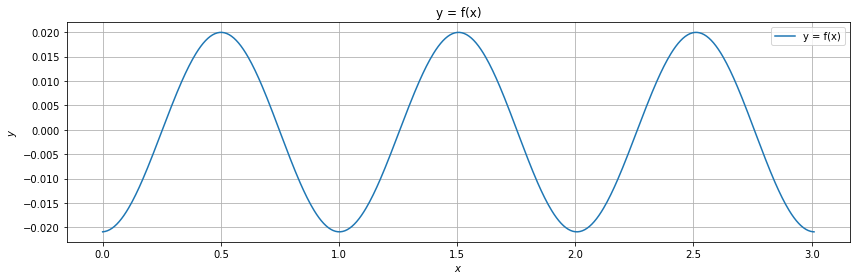

In [ ]:
x_plot = [0] * size * 3
fill_x(x_plot, h)

y_plot = y + y + y

# y = f(x)
plt.figure(figsize=[12, 4])
plt.plot(x_plot, y_plot, label='y = f(x)')

plt.title("y = f(x)")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 
plt.show()

Заметим, что для для полученного решения выполнены условия периодичности:

In [ ]:
print("y(0) = ", y[0])
print("y(1) = ", y[-1])

y(0) =  -0.020891744564019567
y(1) =  -0.020895759459365816


In [ ]:
print("y'(0) = ", (y_plot[1] - y_plot[0]) / h)
print("y'(1) = ", (y_plot[0] - y_plot[-1]) / h)

y'(0) =  0.004758391841049037
y'(1) =  0.0008029790692497263


Решим также систему уравнений алгебраически:

In [ ]:
A = np.array([np.zeros(size) for i in range(size)])
f = np.zeros(size)

A[0][0] = -b[0]
A[0][1] = c[0]
A[0][-1] = a[0]
f[0] = fi_n(0, h)

for i in range(1, size - 1):
    A[i][i - 1] = a[i]
    A[i][i] = -b[i]
    A[i][i + 1] = c[i]
    f[i] = fi_n(i, h)

A[-1][0] = c[-1]
A[-1][-2] = a[-1]
A[-1][-1] = -b[-1]
f[-1] = fi_n(size - 1, h)

y_theory = np.linalg.solve(A, f)

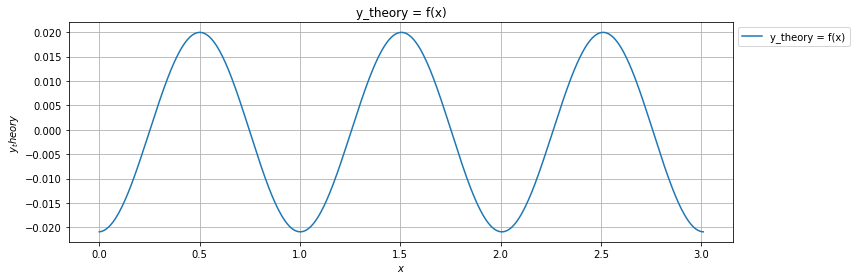

In [ ]:
x_plot = [0] * size * 3
fill_x(x_plot, h)

y_plot = np.concatenate((y_theory, y_theory, y_theory))

# y = f(x)
plt.figure(figsize=[12, 4])
plt.plot(x_plot, y_plot, label='y_theory = f(x)')

plt.title("y_theory = f(x)")
plt.xlabel("$x$")
plt.ylabel("$y_theory$")
plt.grid()
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 
plt.show()

In [ ]:
print("y_theory(0) = ", y_theory[0])
print("y_theory(1) = ", y_theory[-1])

y_theory(0) =  -0.02089174456401997
y_theory(1) =  -0.020895759459366225


In [ ]:
print("y_theory'(0) = ", (y_plot[1] - y_plot[0]) / h)
print("y_theory'(1) = ", (y_plot[0] - y_plot[-1]) / h)

y_theory'(0) =  0.0047583918410504245
y_theory'(1) =  0.0008029790692511141
